.

## Detection and Prevention of Vehicle Insurance Claim Fraud

### Muhammad Haris, Aaron Ramirez, and Outhai Xayavongsa

Vehicle insurance fraud is a major issue that results in significant financial losses for insurance companies and undermines trust in the insurance system. Fraudulent claims can range from staged accidents to exaggerated personal injury claims, complicating the claims process and driving up costs (Punith, 2021). Our key question is: <span style="color: darkred;">How can vehicle and policy data be leveraged to accurately detect and prevent fraudulent insurance claims?</span> Our primary goal is to develop a reliable predictive model that identifies fraudulent claims using historical data. This model aims to help insurance companies reduce financial losses, streamline claims processing, and ensure fair premium pricing for customers.

Our approach to detecting and preventing vehicle insurance claim fraud involves several key steps, which will be meticulously documented and reviewed to ensure technical soundness and business viability:
* **Data Integrity:** Examine the data structure, check for missing values, and convert data types appropriately. This step ensures the foundation of our dataset is solid and ready for analysis.
* **Encoding and Scaling:** Convert categorical variables into numerical formats using one-hot encoding and standardize numerical features. This step is crucial for preparing the data for machine learning algorithms.
* **Exploratory Data Analysis (EDA):** Analyze the target variable distribution, visualize numerical and categorical features, and perform correlation analysis. This provides insights into the data and helps identify patterns.
* **Feature Selection:** Set a correlation threshold, use a Random Forest classifier to determine feature importance, and select the most predictive features. This step helps in identifying the most relevant features for our model.
* **Feature Engineering:**  Enhance the dataset with interaction and polynomial features. This can potentially improve the model's ability to detect complex patterns indicative of fraud.
* **Modeling and Evaluation:** 
  1. Baseline Models: Train baseline models and evaluate their performance to establish a benchmark.
  2. Hyperparameter Tuning: Optimize the models through hyperparameter tuning to enhance performance.
  3. Model Selection: Select the best-performing model based on evaluation metrics.
  4. Ensemble Methods: Combine multiple models to improve accuracy and robustness.
  5. Final Model Training: Train the final model with selected features and prepare it for deployment.<br><br>
  
* **Deployment:** Deploy the model in a production environment and continuously monitor its performance. This step ensures the model is operational and provides real-time fraud detection.
* **Discussion and Conclusion:** Provide actionable recommendations based on the model's findings. Discuss business, ethical, and regulatory risks associated with the deployment and use of the model.

### Understanding the Data
To ensure data integrity and suitability for model training, it's essential to comprehend the data's structure, types, and initial statistics.

In [308]:
# Load libraries
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency

In [129]:
# Load the Dataset
file = 'fraud_oracle.csv'
df = pd.read_csv(file)

# Display all columns
pd.set_option('display.max_columns', None)

# Display first few rows of the dataset
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [130]:
# Descriptive Statistics
df.describe(include='all')

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
count,15420,15420.000000,15420,15420,15420,15420,15420,15420.000000,15420,15420,15420.000000,15420,15420,15420,15420,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420.000000,15420
unique,12,NaN,7,19,2,8,13,NaN,2,4,NaN,2,9,3,6,NaN,NaN,NaN,NaN,NaN,5,4,4,8,9,2,2,2,4,5,5,NaN,3
top,Jan,NaN,Monday,Pontiac,Urban,Monday,Jan,NaN,Male,Married,NaN,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,NaN,NaN,NaN,NaN,NaN,more than 30,more than 30,2 to 4,7 years,31 to 35,No,No,External,none,no change,1 vehicle,NaN,Collision
freq,1411,NaN,2616,3837,13822,3757,1446,NaN,13000,10625,NaN,11230,5584,9671,8079,NaN,NaN,NaN,NaN,NaN,15247,15342,5485,5807,5593,14992,15333,15179,7047,14324,14316,NaN,5962
mean,NaN,2.788586,NaN,NaN,NaN,NaN,NaN,2.693969,NaN,NaN,39.855707,NaN,NaN,NaN,NaN,0.059857,7710.500000,8.483268,407.704280,2.487808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.866472,NaN
std,NaN,1.287585,NaN,NaN,NaN,NaN,NaN,1.259115,NaN,NaN,13.492377,NaN,NaN,NaN,NaN,0.237230,4451.514911,4.599948,43.950998,1.119453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.803313,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,300.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.000000,NaN
25%,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,0.000000,3855.750000,5.000000,400.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.000000,NaN
50%,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,38.000000,NaN,NaN,NaN,NaN,0.000000,7710.500000,8.000000,400.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995.000000,NaN
75%,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,48.000000,NaN,NaN,NaN,NaN,0.000000,11565.250000,12.000000,400.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.000000,NaN


### Data Cleaning

**Checking Missing Values** is crucial as they can impact the performance of machine learning models. Depending on the extent of missing data, different strategies (imputation, removal) may be employed.

In [131]:
# Check Missing Values
print("Missing Values in each column:")
df.isna().sum()

Missing Values in each column:


Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [251]:
# Display basic information about the dataset
print(df.dtypes)

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P            object
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                    object
BasePoli

### Converting Data Types
Ensuring correct data types facilitates proper handling during preprocessing and analysis.

In [133]:
# Data Type Conversion
df['FraudFound_P'] = df['FraudFound_P'].astype(bool)
df['Year'] = df['Year'].astype(object)

#print(df['FraudFound_P'].dtypes)
#print(df['Year'].dtypes)

# Extract numerical and categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

In [195]:
# Convert categorical columns to category dtype
df[categorical_cols] = df[categorical_cols].astype('category')

# Display the first few rows again to confirm changes
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,False,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,False,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,False,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,False,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,False,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


**Encode Categorical Variables and Scale Numerical Colummns**<br>
Machine learning models require numerical inputs, so we need to convert categorical variables into a numerical format using one-hot encoding.

In [137]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)
#df_encoded = df_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))
#df_encoded = df_encoded.map(lambda x: 1 if x is True else (0 if x is False else x))

# Print first few rows of encoded and scaled dataset
df_encoded.head()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,AccidentArea_Urban,DayOfWeekClaimed_Friday,DayOfWeekClaimed_Monday,DayOfWeekClaimed_Saturday,DayOfWeekClaimed_Sunday,DayOfWeekClaimed_Thursday,DayOfWeekClaimed_Tuesday,DayOfWeekClaimed_Wednesday,MonthClaimed_Apr,MonthClaimed_Aug,MonthClaimed_Dec,MonthClaimed_Feb,MonthClaimed_Jan,MonthClaimed_Jul,MonthClaimed_Jun,MonthClaimed_Mar,MonthClaimed_May,MonthClaimed_Nov,MonthClaimed_Oct,MonthClaimed_Sep,Sex_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Fault_Third Party,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,PolicyType_Sport - All Perils,PolicyType_Sport - Collision,PolicyType_Sport - Liability,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sport,VehicleCategory_Utility,VehiclePrice_30000 to 39000,VehiclePrice_40000 to 59000,VehiclePrice_60000 to 69000,VehiclePrice_less than 20000,VehiclePrice_more than 69000,Days_Policy_Accident_15 to 30,Days_Policy_Accident_8 to 15,Days_Policy_Accident_more than 30,Days_Policy_Accident_none,Days_Policy_Claim_8 to 15,Days_Policy_Claim_more than 30,Days_Policy_Claim_none,PastNumberOfClaims_2 to 4,PastNumberOfClaims_more than 4,PastNumberOfClaims_none,AgeOfVehicle_3 years,AgeOfVehicle_4 years,AgeOfVehicle_5 years,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new,AgeOfPolicyHolder_18 to 20,AgeOfPolicyHolder_21 to 25,AgeOfPolicyHolder_26 to 30,AgeOfPolicyHolder_31 to 35,AgeOfPolicyHolder_36 to 40,AgeOfPolicyHolder_41 to 50,AgeOfPolicyHolder_51 to 65,AgeOfPolicyHolder_over 65,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,NumberOfSuppliments_3 to 5,NumberOfSuppliments_more than 5,NumberOfSuppliments_none,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,Year_1995,Year_1996,BasePolicy_Collision,BasePolicy_Liability
0,5,1,21,False,1,12,300,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,3,4,34,False,2,15,400,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,5,2,47,False,3,7,400,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
3,2,1,65,False,4,4,400,2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
4,5,2,27,False,5,3,400,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


**Standardizing numerical features** ensures they have a mean of zero and a standard deviation of one, which helps many machine learning models perform better.

In [138]:
# Scale numerical columns
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# Display the first few rows of the encoded and scaled dataset
df_encoded.head()

#coding note. If the car has 0 for 1995 and 1996, it is considered 1994

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,AccidentArea_Urban,DayOfWeekClaimed_Friday,DayOfWeekClaimed_Monday,DayOfWeekClaimed_Saturday,DayOfWeekClaimed_Sunday,DayOfWeekClaimed_Thursday,DayOfWeekClaimed_Tuesday,DayOfWeekClaimed_Wednesday,MonthClaimed_Apr,MonthClaimed_Aug,MonthClaimed_Dec,MonthClaimed_Feb,MonthClaimed_Jan,MonthClaimed_Jul,MonthClaimed_Jun,MonthClaimed_Mar,MonthClaimed_May,MonthClaimed_Nov,MonthClaimed_Oct,MonthClaimed_Sep,Sex_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Fault_Third Party,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,PolicyType_Sport - All Perils,PolicyType_Sport - Collision,PolicyType_Sport - Liability,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sport,VehicleCategory_Utility,VehiclePrice_30000 to 39000,VehiclePrice_40000 to 59000,VehiclePrice_60000 to 69000,VehiclePrice_less than 20000,VehiclePrice_more than 69000,Days_Policy_Accident_15 to 30,Days_Policy_Accident_8 to 15,Days_Policy_Accident_more than 30,Days_Policy_Accident_none,Days_Policy_Claim_8 to 15,Days_Policy_Claim_more than 30,Days_Policy_Claim_none,PastNumberOfClaims_2 to 4,PastNumberOfClaims_more than 4,PastNumberOfClaims_none,AgeOfVehicle_3 years,AgeOfVehicle_4 years,AgeOfVehicle_5 years,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new,AgeOfPolicyHolder_18 to 20,AgeOfPolicyHolder_21 to 25,AgeOfPolicyHolder_26 to 30,AgeOfPolicyHolder_31 to 35,AgeOfPolicyHolder_36 to 40,AgeOfPolicyHolder_41 to 50,AgeOfPolicyHolder_51 to 65,AgeOfPolicyHolder_over 65,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,NumberOfSuppliments_3 to 5,NumberOfSuppliments_more than 5,NumberOfSuppliments_none,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,Year_1995,Year_1996,BasePolicy_Collision,BasePolicy_Liability
0,1.717545,-1.345408,-1.397554,False,-1.731938,0.764540,-2.450633,-1.329092,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,0.164199,1.037295,-0.434015,False,-1.731714,1.416743,-0.175298,1.350875,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,1.717545,-0.551174,0.529523,False,-1.731489,-0.322464,-0.175298,0.457553,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
3,-0.612473,-1.345408,1.863653,False,-1.731265,-0.974666,-0.175298,-0.435770,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
4,1.717545,-0.551174,-0.952844,False,-1.731040,-1.192067,-0.175298,-1.329092,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,

In [139]:
# Extract the target column
target_col = df_encoded['FraudFound_P'].copy()

#target_col.head()

## Exploratory Data Analysis (EDA)

Analyze the target variable distribution, visualize numerical and categorical features, and perform correlation analysis. This provides insights into the data and helps identify patterns.

**Distribution of Target Variable**<br>

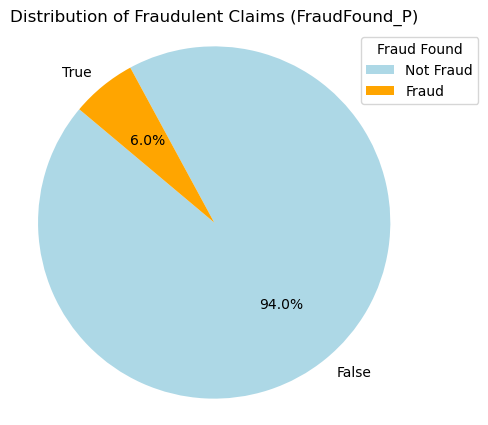

In [263]:
# Count the occurrences of each category in FraudFound_P
fraud_counts = df['FraudFound_P'].value_counts()

# Plot the pie chart
plt.figure(figsize=(5, 5))  # Increase the figure size for better readability
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'orange'])
plt.title('Distribution of Fraudulent Claims (FraudFound_P)', fontsize=12)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title='Fraud Found', labels=['Not Fraud', 'Fraud'], loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

<span style="color: darkred;">The pie chart shows that 94% of the claims are not fraudulent, while only **6%** are identified as **fraudulent.** This indicates that fraudulent claims make up a small portion of the overall claims. It underscores the challenge of fraud detection due to the rarity of fraudulent cases compared to the overwhelming number of legitimate claims.</span>

**Numerical Feature Analysis**<br>
Visualize the distribution of numerical features and their relationship with the target variable.

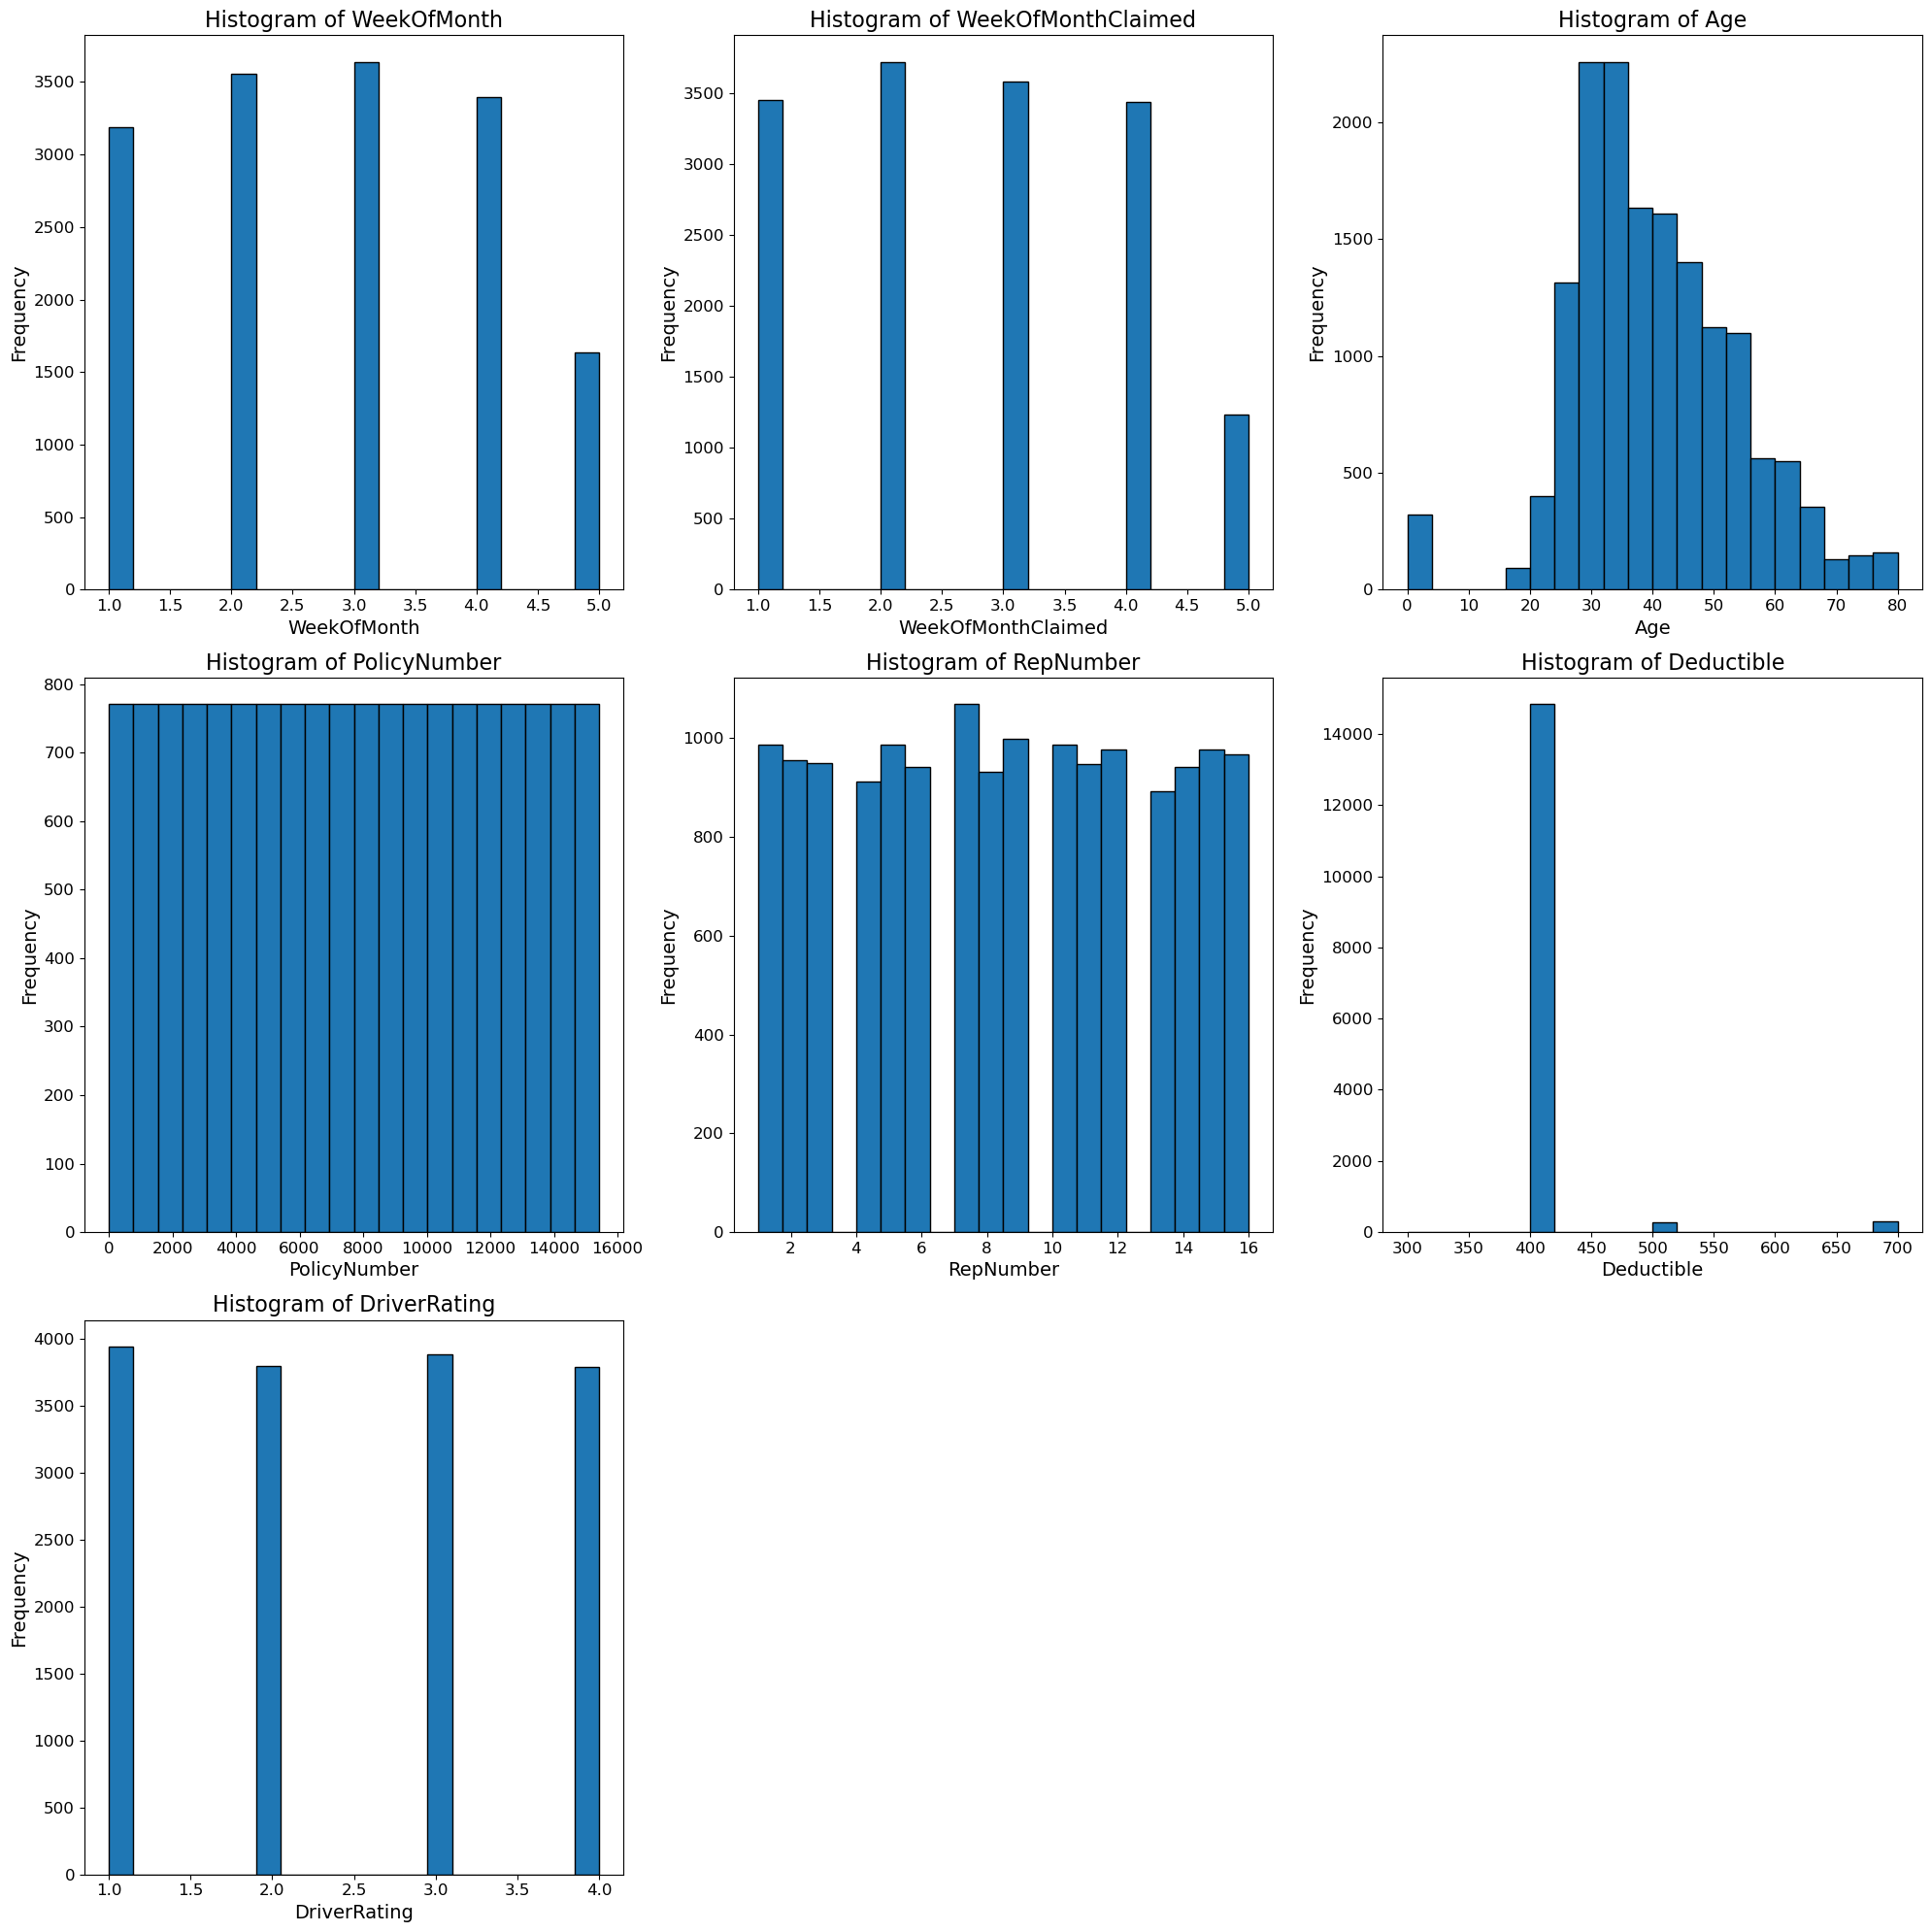

In [293]:
# Plot histograms for numerical features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plotting histograms with larger labels for x and y axis
plt.figure(figsize=(20, 20))
for i, col in enumerate(num_cols):
    plt.subplot((len(num_cols) // 3) + 1, 3, i + 1)
    plt.hist(df[col], bins=20, edgecolor='black')
    plt.title(f'Histogram of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

<span style="color: darkred;">From these histograms, several patterns emerge that might impact fraud detection. </span>
* <span style="color: darkred;">The distribution of **Ag**e is right-skewed, with a higher concentration of claims from individuals aged 30 to 50, suggesting that this age group may be more susceptible to fraudulent activities. </span>
* <span style="color: darkred;">The **PolicyNumber** shows a uniform distribution, indicating no specific policy sequence associated with fraud. </span>
* <span style="color: darkred;">The **Deductible** distribution reveals a concentration at lower values, specifically around 400, which could suggest that lower deductible policies might be more prone to fraudulent claims. </span>
* <span style="color: darkred;">**RepNumber** indicates some variation, which may hint at certain representatives having higher fraud incidents. </span>
* <span style="color: darkred;">**DriverRating** is evenly distributed, showing no significant impact on fraud. </span>
* <span style="color: darkred;">**WeekOfMonth** and **WeekOfMonthClaimed** both show consistent distributions, implying that the timing within a month does not significantly affect fraud occurrence. </span>

<span style="color: darkred;">These insights underscore the need for a nuanced approach to fraud detection, leveraging advanced machine learning techniques to identify subtle and complex patterns.

**Target-based Feature Distribution**<br>
It is crucial for feature selection and engineering as it relates the features to the problem of fraud detection.

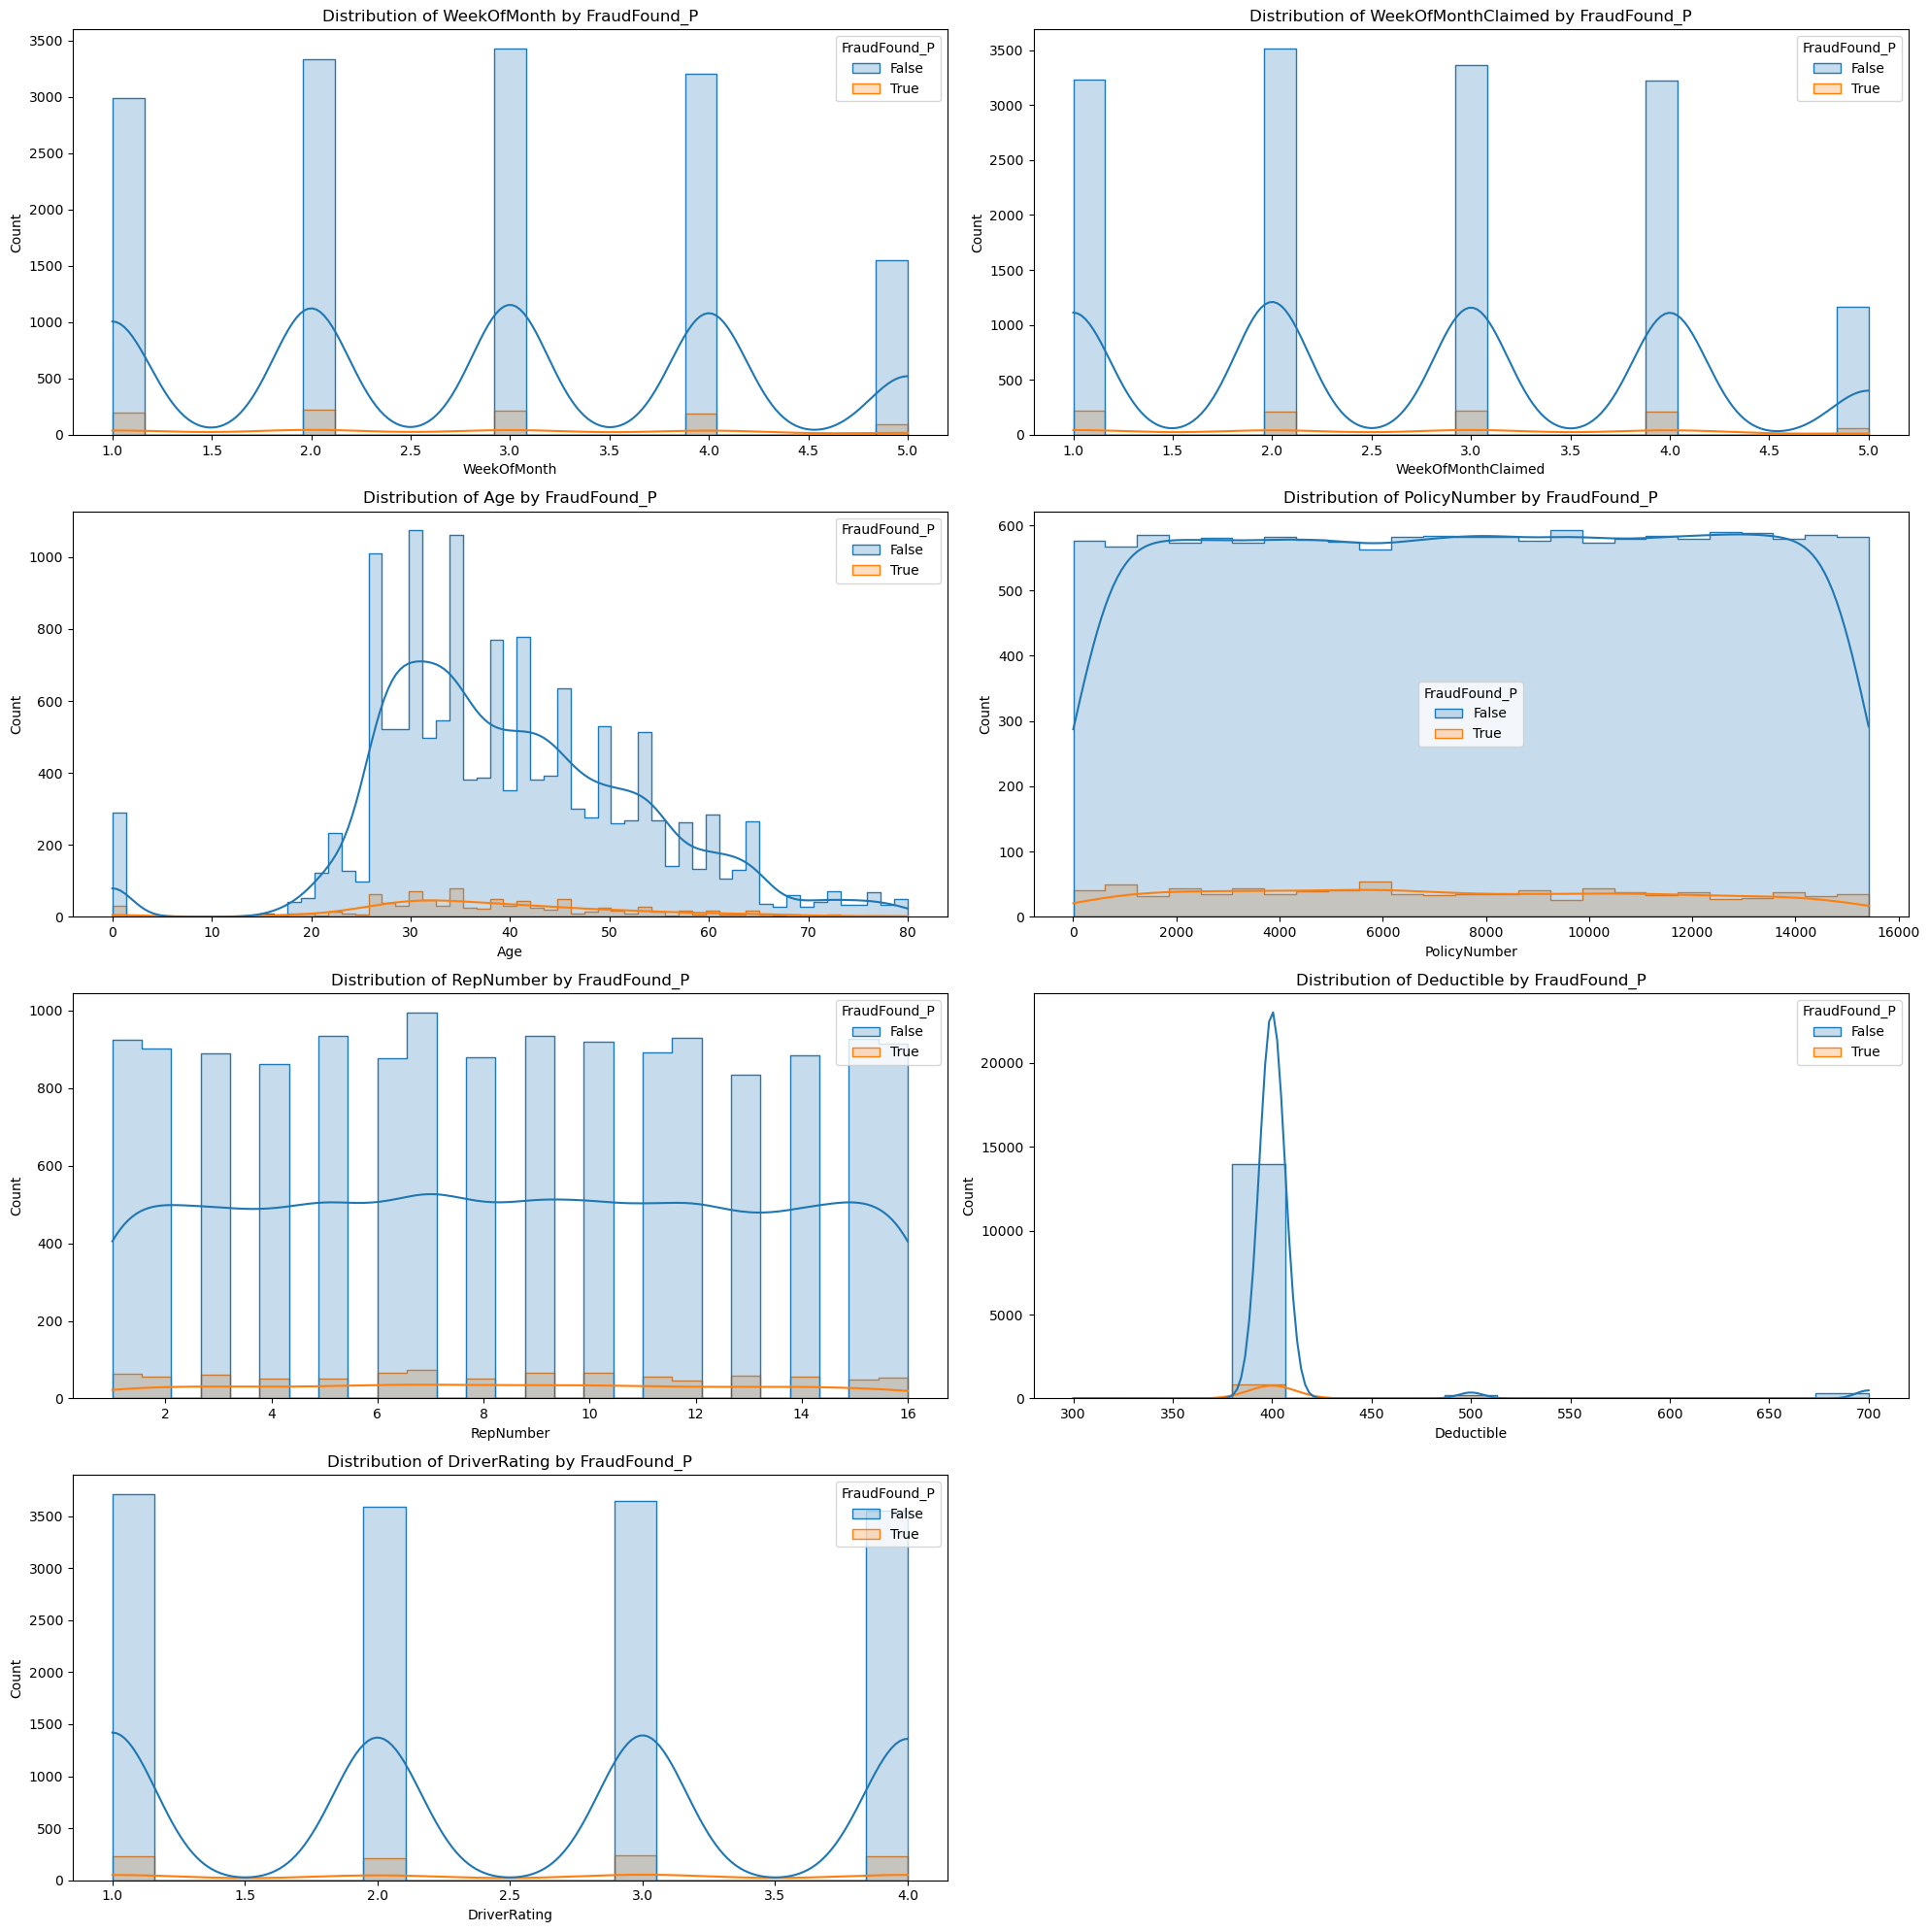

In [231]:
# Plot distribution of numerical features by FraudFound_P
plt.figure(figsize=(20, 20))  # Increase the height of the figure
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Adjusting the number of plots per row
plots_per_row = 2

for i, col in enumerate(num_cols):
    plt.subplot((len(num_cols) // plots_per_row) + 1, plots_per_row, i + 1)
    sns.histplot(data=df, x=col, hue='FraudFound_P', kde=True, element='step')
    plt.title(f'Distribution of {col} by FraudFound_P')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

<span style="color: darkred;">These visualizations highlight a few key insights regarding fraudulent claims. </span>
* <span style="color: darkred;">Notably, the distribution of fraudulent claims shows a slight concentration in the 30-50 **age** range, suggesting individuals within this bracket might be more prone to fraud. On the other hand, The histogram of age distribution in fraudulent claims indicates a significant spike in the 25-35 age range. This pattern aligns with findings from a survey by Verisk and the Coalition Against Insurance Fraud, which suggests that younger generations (ages 18-44) exhibit a higher tolerance and willingness to engage in insurance fraud compared to older generations (MehaffyWeber, 2023).</span>
* <span style="color: darkred;">The **PolicyNumber** and **Deductible** distributions indicate no particular sequence pattern or deductible amount that differentiates fraudulent claims, as both are uniformly distributed. </span>
* <span style="color: darkred;">Additionally, the **RepNumber** distribution hints at potential biases or internal issues, as some representatives may have higher incidences of fraud. </span>
* <span style="color: darkred;">The **DriverRating** distribution is even, indicating it is not a strong predictor of fraud. </span><br>

<span style="color: darkred;">Overall, these observations suggest that fraudulent claims are spread across various features, underscoring the need for advanced modeling techniques to detect complex interactions and subtle patterns effectively. Both analyses are necessary. The first set provides a foundational understanding of the data, while the second set builds on this by showing how the features interact with the target variable. Together, they offer a comprehensive view that is essential for effective feature engineering and selection in machine learning workflows.</span>

The **boxplots** compare the distribution of numerical features between fraudulent and non-fraudulent claims.

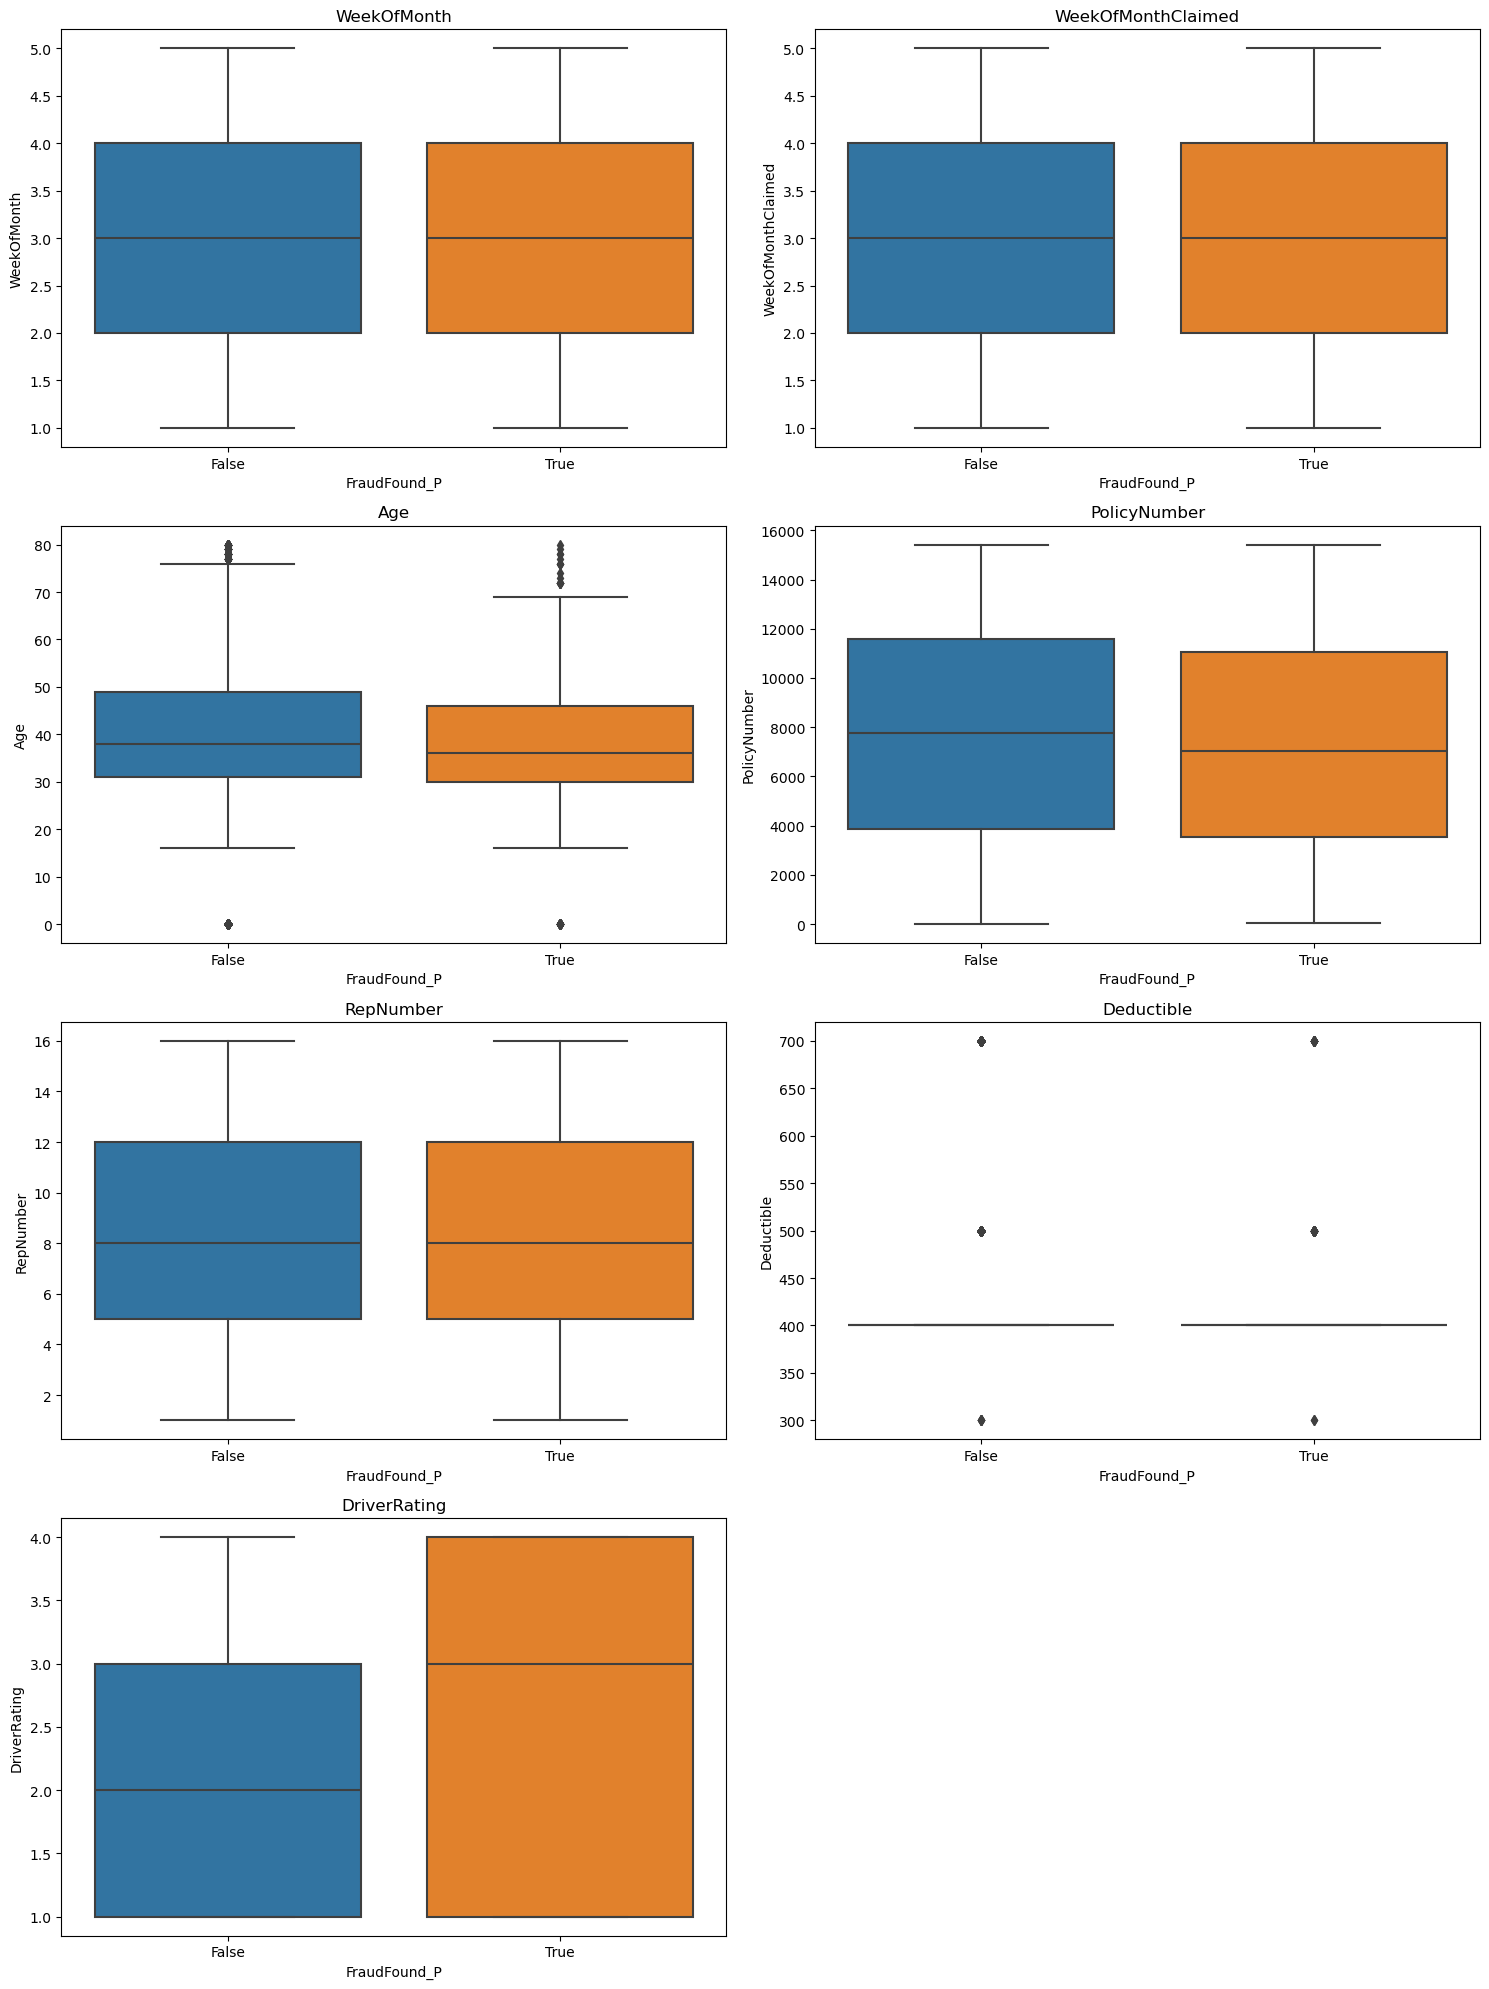

In [214]:
# Plot boxplots to check for outliers and their relation with the target variable
plt.figure(figsize=(15, 20))
for i, col in enumerate(num_cols):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x='FraudFound_P', y=col, data=df)
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

<span style="color: darkred;">The boxplots above compare various numerical features against the target variable, FraudFound_P. </span>
* <span style="color: darkred;">The boxplots for **"WeekOfMonth"** and **"WeekOfMonthClaimed"** show a similar distribution between fraudulent and non-fraudulent claims, suggesting these features may not significantly differentiate fraud. These also show no significant outliers. No removal is needed here.</span>
* <span style="color: darkred;">The **"Age"** feature shows a slight difference, with fraudulent claims tending to involve slightly older individuals, but with significant overlap. There are a few outliers, particularly for ages above 70. Eventhough, we have these outliers, they are not extreme enough that it will distort our model. It is possible to remove them if they are considered anomalies. Elderly drivers are more likely to have insurance claims due to increased accident risks stemming from health issues and stringent legal requirements (Alvendia, 2024).</span>
* <span style="color: darkred;">**"PolicyNumber"** and **"RepNumber"** also do not show distinct differences between fraud and non-fraud cases. No outliers exist. </span>
* <span style="color: darkred;">The **"Deductible"** There are a few extreme outliers below 350 and above 600. This could distort the model and should be removed. The central tendency is similar for both fraud and non-fraud. </span>
* <span style="color: darkred;">Lastly, **"DriverRating"** shows a slight increase in ratings for fraudulent claims, though the difference is minor. No outliers exist.<br><br>Overall, the boxplots indicate that many features do not strongly distinguish between fraudulent and non-fraudulent claims, with some exceptions requiring further analysis. Outliers exist in Deductible.</span>

Outlier Removal: Identify and remove outliers from the Deductible feature.

In [257]:
# Identify outliers in the "Deductible" feature
Q1 = df['Deductible'].quantile(0.25)
Q3 = df['Deductible'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for acceptable data
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df['Deductible'] >= lower_bound) & (df['Deductible'] <= upper_bound)]

# Display the shape of the dataframe before and after outlier removal
print("Original dataset shape:", df.shape)
print("Dataset shape after outlier removal:", df_cleaned.shape)

Original dataset shape: (15420, 33)
Dataset shape after outlier removal: (14838, 33)


<span style="color: darkred;">Since the other features do not have significant outliers or the outliers are not extreme enough to distort the model, no further outlier removal is necessary.</span>

The **chi-square test** is used to examine the relationship between each categorical feature and the target variable (FraudFound_P).

In [300]:
# Convert categorical variables to strings to ensure consistent handling
cat_cols = df.select_dtypes(include=['object', 'category']).columns
df[cat_cols] = df[cat_cols].astype(str)
df['FraudFound_P'] = df['FraudFound_P'].astype(str)

# Calculate chi-square statistics and store in a DataFrame
chi2_results = []
for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df['FraudFound_P'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results.append({'Feature': col, 'Chi2': chi2, 'p-value': p, 'Degrees of Freedom': dof})

chi2_df = pd.DataFrame(chi2_results)
chi2_df

,Feature,Chi2,p-value,Degrees of Freedom
0,Month,29.796429,1.705480e-03,11
1,DayOfWeek,10.150635,1.184501e-01,6
2,Make,59.809999,2.195889e-06,18
3,AccidentArea,16.844310,4.057480e-05,1
4,DayOfWeekClaimed,5.159623,6.404907e-01,7
5,MonthClaimed,42.266750,3.003256e-05,12
6,Sex,13.489894,2.398518e-04,1
7,MaritalStatus,1.013512,7.979825e-01,3
8,Fault,264.953824,1.428036e-59,1
9,PolicyType,437.401870,1.848256e-89,8


<span style="color: darkred;">The chi-square test examines the relationship between each categorical feature and the target variable (FraudFound_P). Features with low p-values indicate a significant association with fraud, providing insights for model development.</span>

<span style="color: darkred;">Results with best association to fraud:</span>
* <span style="color: darkred;">PolicyType</span>
* <span style="color: darkred;">VehicleCategory</span>
* <span style="color: darkred;">Fault</span>
* <span style="color: darkred;">BasePolicy</span>
* <span style="color: darkred;">VehiclePrice</span>
* <span style="color: darkred;">Make</span>
* <span style="color: darkred;">AddressChange_Claim</span>
* <span style="color: darkred;">PastNumberOfClaims</span>
* <span style="color: darkred;">MonthClaimed</span>
* <span style="color: darkred;">AgeOfPolicyHolder</span>
* <span style="color: darkred;">AccidentArea</span>
* <span style="color: darkred;">Days_Policy_Accident</span>
* <span style="color: darkred;">Sex</span>
* <span style="color: darkred;">NumberOfSuppliments</span>
* <span style="color: darkred;">AgentType</span>
* <span style="color: darkred;">AgeOfVehicle</span>

The **t-test** is performed to determine if there are statistically significant differences in the means of numerical features between fraudulent and non-fraudulent claims.

In [307]:
# Convert the target variable to numerical
df['FraudFound_P'] = df['FraudFound_P'].astype(int)

# Define groups
fraudulent = df[df['FraudFound_P'] == 1]
non_fraudulent = df[df['FraudFound_P'] == 0]

# List of numerical features
numerical_features = ['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating']

# Perform t-tests for each numerical feature
alpha = 0.05  # significance level
results = []

for feature in numerical_features:
    t_stat, p_val = stats.ttest_ind(fraudulent[feature].dropna(), non_fraudulent[feature].dropna())
    result = {
        'Feature': feature,
        'T-statistic': t_stat,
        'P-value': p_val,
        'Significant': p_val < alpha
    }
    results.append(result)
    # Print results
    print(f'Feature: {feature}')
    print(f'T-statistic: {t_stat}')
    print(f'P-value: {p_val}')
    if p_val < alpha:
        print("Reject the null hypothesis: There is a significant difference between the two groups.\n")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference between the two groups.\n")

# Convert results to DataFrame for better visualization if needed
results_df = pd.DataFrame(results)
print(results_df)

Feature: WeekOfMonth
T-statistic: -1.4729342644344183
P-value: 0.14078917523145648
Fail to reject the null hypothesis: There is no significant difference between the two groups.

Feature: WeekOfMonthClaimed
T-statistic: -0.7153534148245128
P-value: 0.47440152274095515
Fail to reject the null hypothesis: There is no significant difference between the two groups.

Feature: Age
T-statistic: -3.6945702717175912
P-value: 0.00022102056801804657
Reject the null hypothesis: There is a significant difference between the two groups.

Feature: PolicyNumber
T-statistic: -2.5267037335650477
P-value: 0.01152377750793551
Reject the null hypothesis: There is a significant difference between the two groups.

Feature: RepNumber
T-statistic: -0.9376604012363482
P-value: 0.3484336475250911
Fail to reject the null hypothesis: There is no significant difference between the two groups.

Feature: Deductible
T-statistic: 2.1543955340979646
P-value: 0.031224609090792894
Reject the null hypothesis: There is a si

<span style="color: darkred;">Based on the **T-Test**, the features **Age, PolicyNumber, and Deductible** show significant differences between fraudulent and non-fraudulent claims.</span>

**Categorical Feature Analysis** using the bar plots involves examining the frequency distribution of categorical variables and their relationship with the target variable, FraudFound_P.

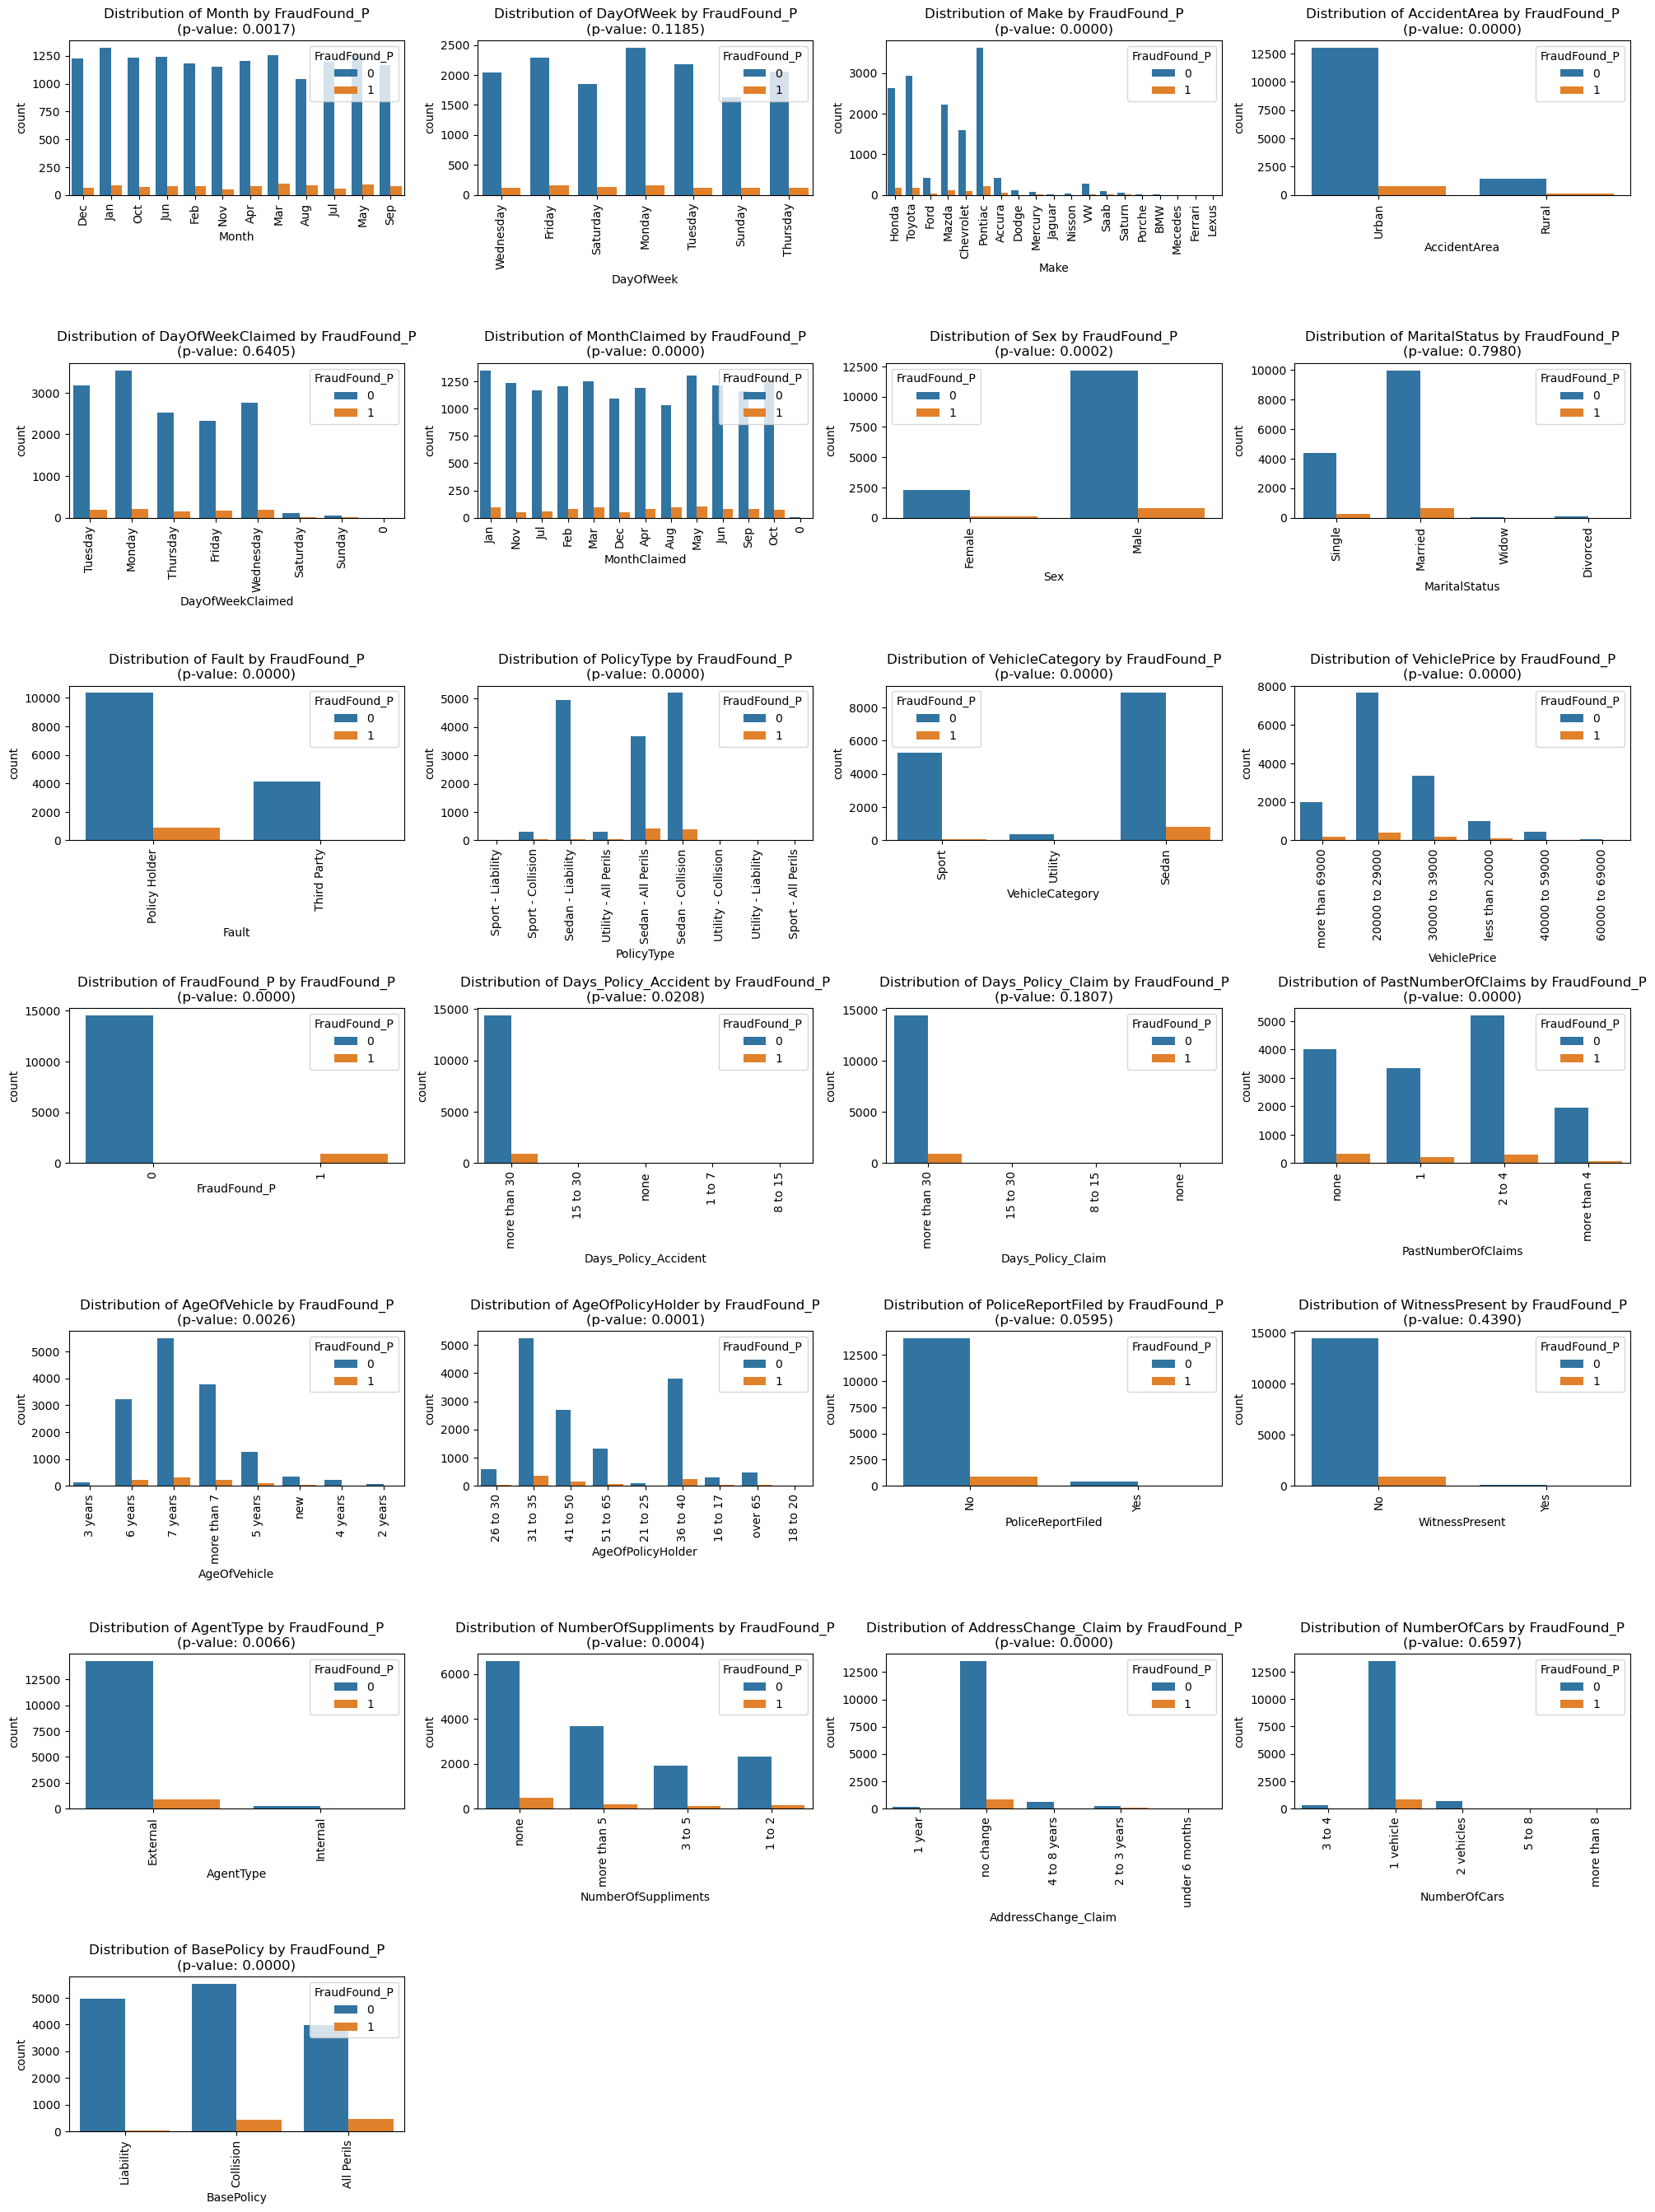

In [301]:
# Plot bar plots for categorical features
plt.figure(figsize=(20, 30))
for i, col in enumerate(cat_cols):
    plt.subplot(8, 4, i + 1)
    sns.countplot(x=col, hue='FraudFound_P', data=df)
    p_value = chi2_df.loc[chi2_df['Feature'] == col, 'p-value'].values[0]
    plt.title(f'Distribution of {col} by FraudFound_P\n(p-value: {p_value:.4f})')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<span style="color: darkred;">Based on the **bar plot** visual analysis, the features that stand out with a noticeable difference in fraudulent activity are:

* <span style="color: darkred;">**Fault:** Fraudulent claims are significantly higher when the policyholder is at fault. This feature has a clear distinction between fraud and non-fraud cases.
    
* <span style="color: darkred;">**PolicyType:** Certain policy types, especially "Sport - Collision" and "Utility - Collision," show a markedly higher incidence of fraudulent claims.
    
* <span style="color: darkred;">**VehicleCategory:** Sports vehicles have a significantly higher number of fraudulent claims compared to other categories.
    
* <span style="color: darkred;">**BasePolicy:** 'Liability' policies are associated with a higher number of fraudulent claims compared to 'Collision' and 'All Perils' policies.

* <span style="color: darkred;">**VehiclePrice:** Mid-range vehicles (such as those priced between 30,000 to 39,000 and 40,000 to 59,000) show a higher incidence of fraud.
    
* <span style="color: darkred;">**PastNumberOfClaims:** Individuals with '2 to 4' and 'more than 4' past claims exhibit higher rates of fraudulent activity.
    
* <span style="color: darkred;">**Make:** Certain makes, such as Honda, Toyota, Mazda, and Pontiac, have higher fraudulent claim rates.
    
* <span style="color: darkred;">**Sex:** Males show a higher number of fraudulent claims compared to females.
    
* <span style="color: darkred;">**AgeOfVehicle:** Newer vehicles (3 to 4 years old) have a noticeably higher rate of fraudulent claims.
    
* <span style="color: darkred;">**AddressChange_Claim:** Policyholders with no recent address changes have more fraudulent claims, suggesting this feature is a significant indicator of fraud.

**Pair Plot** will help us visualize the pairwise relationships between features and the target variable.

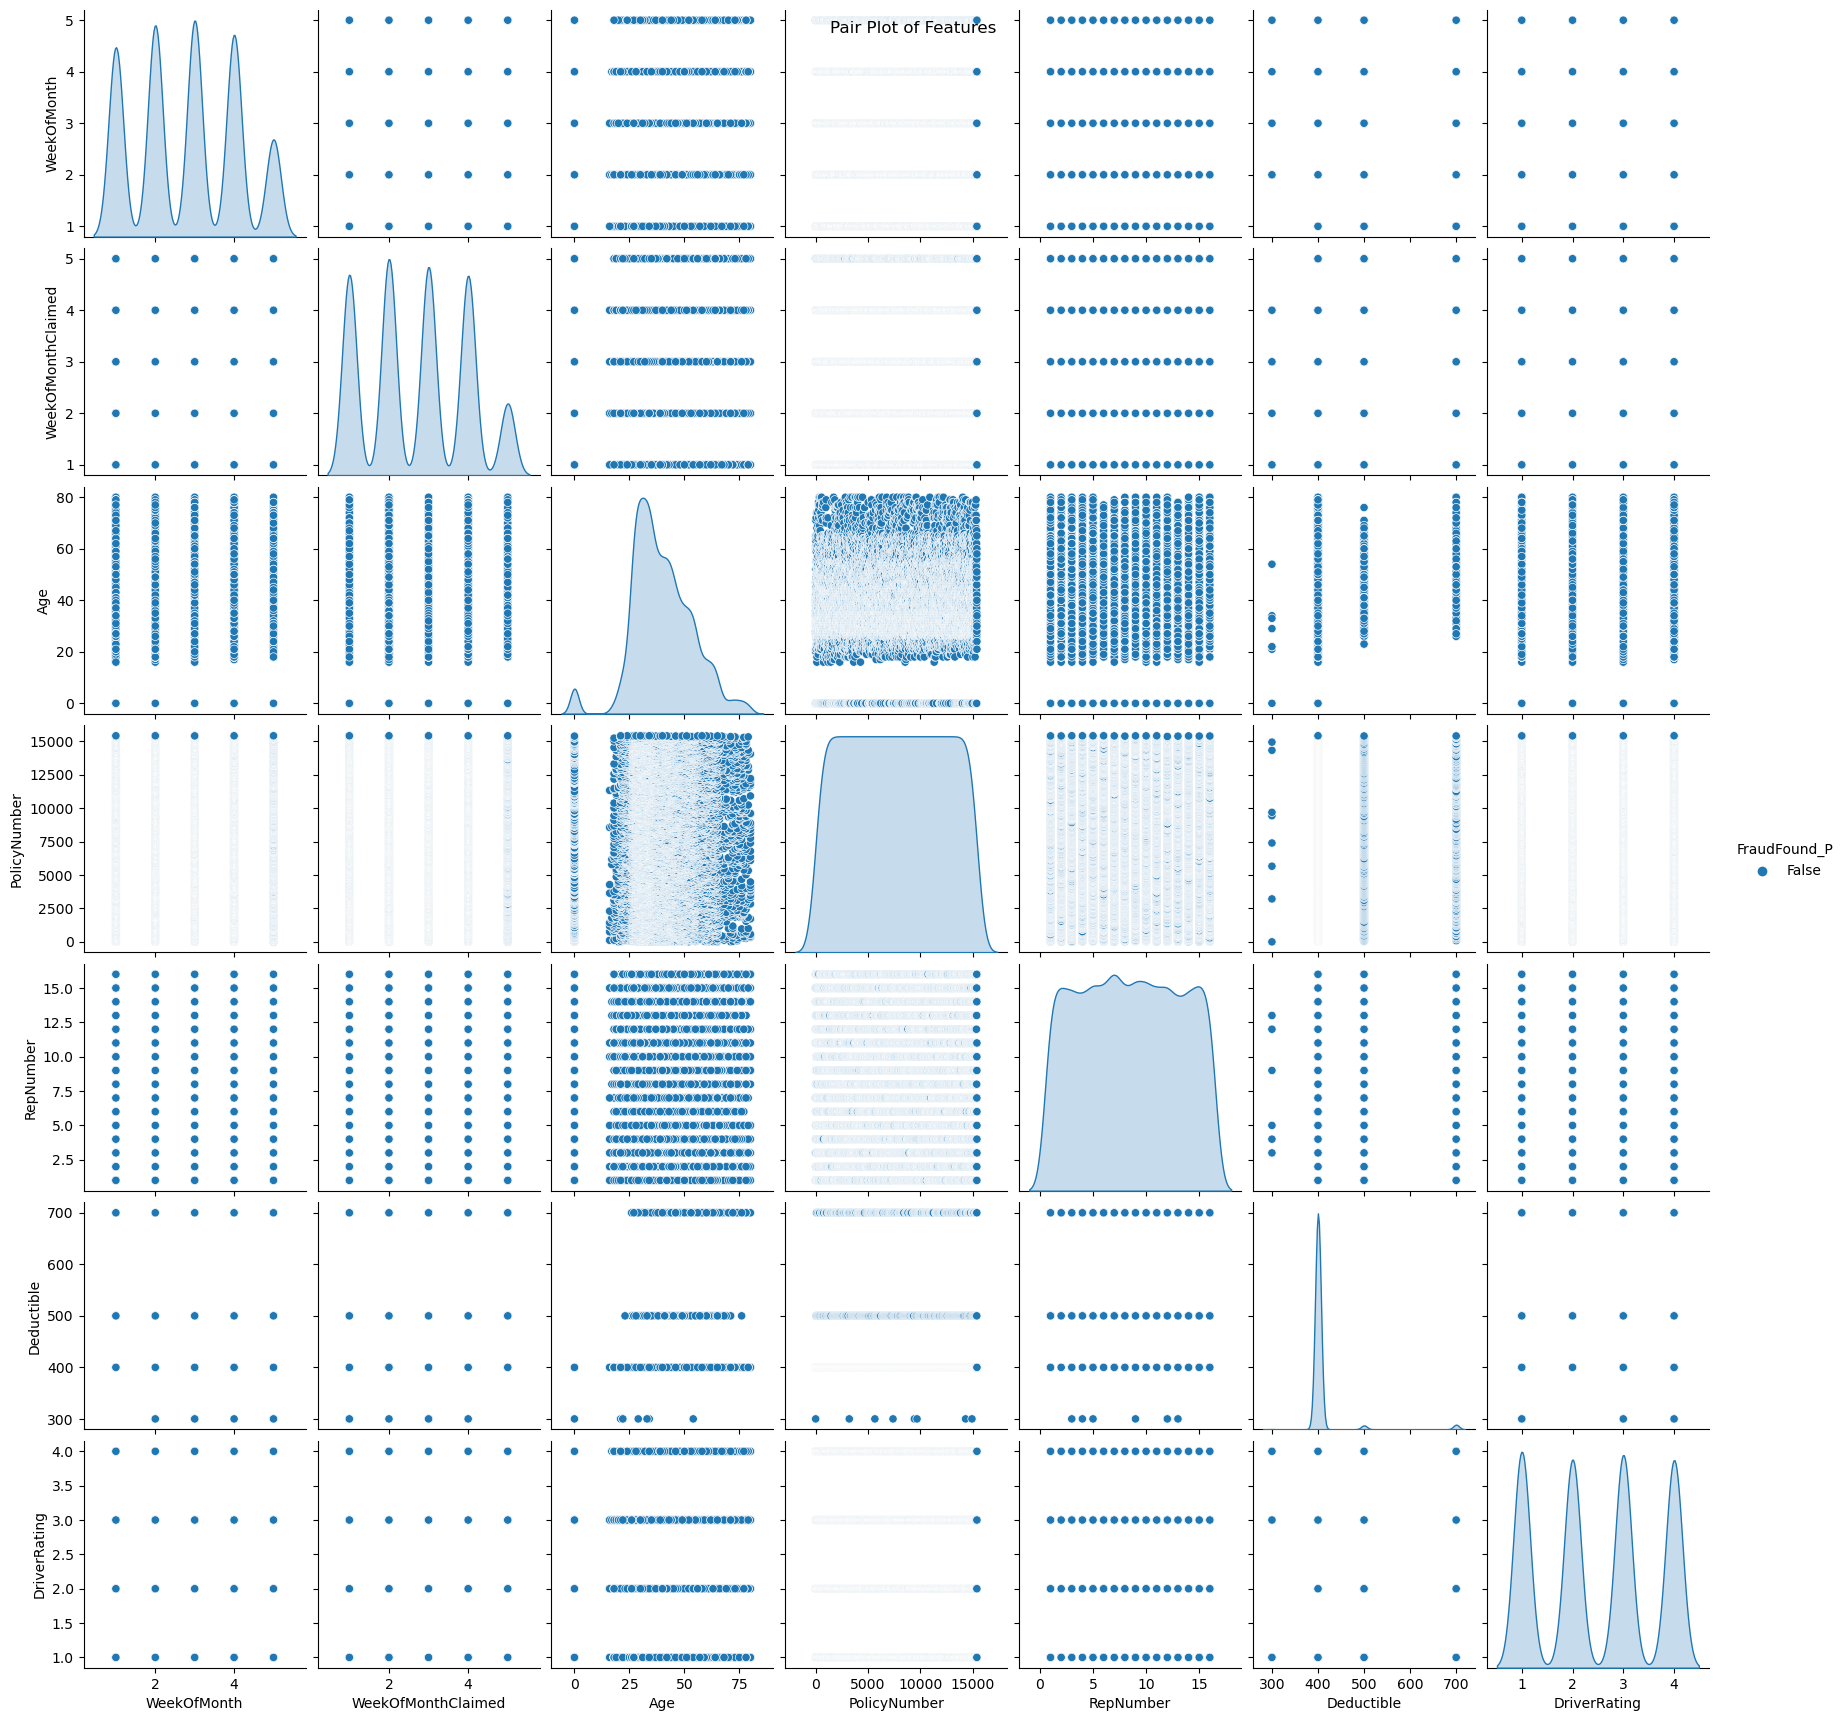

In [294]:
# Plot pair plot
sns.pairplot(df, hue='FraudFound_P', diag_kind='kde')
plt.suptitle('Pair Plot of Features')
plt.show()

<span style="color: darkred;">The **pair plot** provides a comprehensive visualization of the relationships and distributions among several numerical features in the dataset, highlighting their interaction with the target variable, FraudFound_P. Key features analyzed include WeekOfMonth, WeekOfMonthClaimed, Age, PolicyNumber, RepNumber, Deductible, and DriverRating. The distribution of WeekOfMonth and WeekOfMonthClaimed is even across different weeks, showing no clear distinction between fraudulent and non-fraudulent claims. The age distribution is right-skewed, with most claimants between 20 and 50 years old, but no strong separation based on age is observed. PolicyNumber appears uniformly distributed, indicating no particular sequence pattern that differentiates fraudulent claims, while RepNumber shows a varied distribution, which could be further explored for potential bias. The deductible amounts are concentrated at specific values, with no clear separation for fraudulent claims, and DriverRating is evenly distributed across its range, again showing no distinct separation for fraudulent claims.</span>

<span style="color: darkred;">The scatter plots in the pair plots do not reveal strong linear relationships between pairs of features, indicating that the relationships might be complex and non-linear, making machine learning models like Random Forests or XGBoost suitable. Color coding by FraudFound_P (False in light blue and True in salmon) shows no clear clusters or separations in the scatter plots, suggesting that fraudulent claims are not easily distinguishable based on simple visual inspection. This reinforces the need for sophisticated modeling techniques due to the imbalanced nature of the dataset, with fraudulent claims being relatively rare compared to non-fraudulent ones. <br></span>

Plot the **correlation matrix** for all numerical features in the dataset. This involves calculating the pairwise correlation coefficients between all numerical variables. Correlation coefficients range from -1 (negative correlation) to 1 (positive correlation)

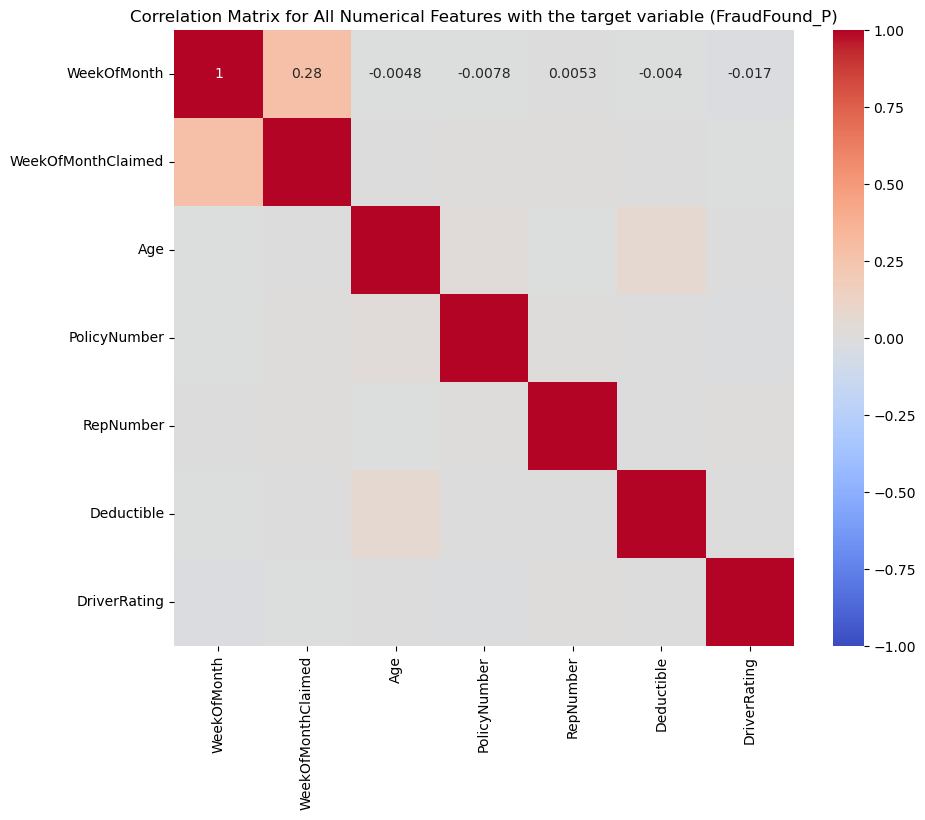

In [306]:
# Calculate the correlation matrix
corr_matrix = df[num_cols].corr()

# Correlation Matrix for all Numerical Features
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for All Numerical Features with the target variable (FraudFound_P)')
plt.show()

<span style="color: darkred;">The **correlation matrix**, we can observe the correlations between the numerical features and the target variable (FraudFound_P). The feature that has the strongest correlation with FraudFound_P is **DriverRating**, with a correlation coefficient of -0.017. However, it is important to note that the correlation is very weak (close to zero), indicating that none of the numerical features have a strong linear relationship with the target variable in this dataset.</span>

### References
Alvendia, R. (2024, March 6). <i>Elderly safety in car accidents.</i> AKD Lawyers. https://www.akdlawyers.com/car-accident/elderly-safety-in-car-accidents/

Bansal, S. (2022). <i>Vehicle insurance claim fraud detection.</i> Kaggle.     https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection

MehaffyWeber. (2023, October 3). <i>Survey finds younger generations have a higher tolerance for insurance fraud – What insurers should know.</i> MehaffyWeber. https://www.mehaffyweber.com/news/survey-finds-younger-generations-have-a-higher-tolerance-for-insurance-fraud-what-insurers-should-know/

Punith. (2021, June 24). <i>Insurance claims — Fraud detection using machine learning.</i> Geek Culture.   https://medium.com/geekculture/insurance-claims-fraud-detection-using-machine-learning-78f04913097